# **Model Building**

Importing Libraries

In [0]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, linear_model, model_selection
import gc; gc.enable()
import random
from sklearn.ensemble import RandomForestRegressor

Loading the merged train,location and item dataset.

In [0]:
train_loc_item = pd.read_pickle('/content/drive/My Drive/PHD/train_loc_item.pkl')

In [0]:
train_loc_item.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,2015-01-01,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
1,2015-01-02,location_25,item_103665,5.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
2,2015-01-04,location_25,item_103665,5.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
3,2015-01-05,location_25,item_103665,5.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
4,2015-01-06,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1


Function for Label Encoder:

In [0]:
def df_lbl_enc(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            lbl = preprocessing.LabelEncoder()
            df[c] = lbl.fit_transform(df[c])
            print(c)
    return df

In [0]:
train_loc_item['date'] = pd.to_datetime(train_loc_item.date)

Creating a subset of data from 2017-01-01 for better computation.

In [0]:
data_2 = train_loc_item[train_loc_item['date'] >= '2017-01-01']

Resetting the Index

In [0]:
data_2 = data_2.reset_index(drop=True)

Creating subset of training data and saving as a pickle file so that it can be used for model building for trying different approaches and for better computation efficiency.

In [0]:
oneyr = train_loc_item[train_loc_item['date'] >= '2018-01-01']

In [0]:
oneyr = oneyr.reset_index(drop=True)

In [0]:
oneyr.to_pickle('/content/drive/My Drive/PHD/oneyr.pkl')

In [0]:
del train_total['location_identifier']

Creating a subset of data for the first 15 days of January from 2015 to 2018 for further approaches in model building.

In [0]:
data_filtered = train_loc_item[(train_loc_item['date'].dt.month == 1) & (train_loc_item['date'].dt.day < 16)]

In [0]:
data_filtered.tail()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable
101686565,2018-01-05,location_47,item_1919674,2.0,False,Bengaluru,Karnataka,A,14,personal_care,class_4138,0
101686566,2018-01-15,location_47,item_1919674,1.0,False,Bengaluru,Karnataka,A,14,personal_care,class_4138,0
101686707,2018-01-09,location_50,item_1919674,1.0,False,Gurgaon,Haryana,A,14,personal_care,class_4138,0
101686708,2018-01-11,location_50,item_1919674,1.0,False,Gurgaon,Haryana,A,14,personal_care,class_4138,0
101686709,2018-01-15,location_50,item_1919674,1.0,False,Gurgaon,Haryana,A,14,personal_care,class_4138,0


In [0]:
data_filtered.shape

(3614828, 12)

In [0]:
data_filtered = data_filtered.reset_index(drop=True)

In [0]:
data_filtered.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,2015-01-01,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
1,2015-01-02,location_25,item_103665,5.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
2,2015-01-04,location_25,item_103665,5.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
3,2015-01-05,location_25,item_103665,5.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
4,2015-01-06,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1


In [0]:
data_filtered.to_pickle('./data_filtered.pkl')

Using 2 years data

In [0]:
data_filtered1 = data_2

In [0]:
data_filtered1.dtypes

date                datetime64[ns]
locationId                category
item_id                     object
unit_sales                 float64
onpromotion               category
city                      category
state                     category
type                      category
cluster                   category
category_of_item          category
class                     category
perishable                category
dtype: object

Creating additional features - Year, Month, Day and Day of Week.

In [0]:
data_filtered1['date'] = pd.to_datetime(data_filtered1['date'])
data_filtered1['year'] = data_filtered1['date'].dt.year
data_filtered1['mon'] = data_filtered1['date'].dt.month
data_filtered1['day'] = data_filtered1['date'].dt.day
data_filtered1['date'] = data_filtered1['date'].dt.dayofweek

In [0]:
data_filtered1.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable,year,mon,day
0,6,location_25,item_103665,12.0,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1,2017,1,1
1,0,location_25,item_103665,31.0,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1,2017,1,2
2,1,location_25,item_103665,10.0,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1,2017,1,3
3,2,location_25,item_103665,5.0,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1,2017,1,4
4,3,location_25,item_103665,9.0,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1,2017,1,5


In [0]:
data_filtered1.dtypes

date                   int64
locationId          category
item_id               object
unit_sales           float64
onpromotion         category
city                category
state               category
type                category
cluster             category
category_of_item    category
class               category
perishable          category
year                   int64
mon                    int64
day                    int64
dtype: object

In [0]:
data_filtered1['perishable'] = data_filtered1['perishable'].astype('int8')

In [0]:
data_filtered1['item_id'] = data_filtered1['item_id'].astype('object')
data_filtered1['city'] = data_filtered1['city'].astype('object')
data_filtered1['state'] = data_filtered1['state'].astype('object')
data_filtered1['type'] = data_filtered1['type'].astype('object')
data_filtered1['cluster'] = data_filtered1['cluster'].astype('int8')
data_filtered1['class'] = data_filtered1['class'].astype('object')
data_filtered1['category_of_item'] = data_filtered1['category_of_item'].astype('object')
data_filtered1['onpromotion'] = data_filtered1['onpromotion'].astype('object')
data_filtered1['locationId'] = data_filtered1['locationId'].astype('object')

In [0]:
data_filtered1.dtypes

date                  int64
locationId           object
item_id              object
unit_sales          float64
onpromotion          object
city                 object
state                object
type                 object
cluster                int8
category_of_item     object
class                object
perishable             int8
year                  int64
mon                   int64
day                   int64
dtype: object

Using Label Encoding for categorical variables since there are more unique levels in each categorical variables.

In [0]:
data_filtered1 = df_lbl_enc(data_filtered1)

locationId
item_id
onpromotion
city
state
type
category_of_item
class


In [0]:
data_filtered1.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable,year,mon,day
0,6,17,45,12.0,0,10,11,3,1,0,179,1,2017,1,1
1,0,17,45,31.0,0,10,11,3,1,0,179,1,2017,1,2
2,1,17,45,10.0,0,10,11,3,1,0,179,1,2017,1,3
3,2,17,45,5.0,0,10,11,3,1,0,179,1,2017,1,4
4,3,17,45,9.0,0,10,11,3,1,0,179,1,2017,1,5


In [0]:
data_filtered1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63094515 entries, 0 to 63094514
Data columns (total 15 columns):
date                int64
locationId          int64
item_id             int64
unit_sales          float64
onpromotion         int64
city                int64
state               int64
type                int64
cluster             int8
category_of_item    int64
class               int64
perishable          int8
year                int64
mon                 int64
day                 int64
dtypes: float64(1), int64(12), int8(2)
memory usage: 6.2 GB


In [0]:
data_filtered1.to_pickle('./data_filtered1.pkl')

In [0]:
data_filtered1['item_id'] = data_filtered1['item_id'].astype('int32')
data_filtered1['locationId'] = data_filtered1['locationId'].astype('int16')
data_filtered1['date'] = data_filtered1['date'].astype('int8')
data_filtered1['day'] = data_filtered1['day'].astype('int8')
data_filtered1['mon'] = data_filtered1['mon'].astype('int8')
data_filtered1['city'] = data_filtered1['city'].astype('int8')
data_filtered1['state'] = data_filtered1['state'].astype('int8')
data_filtered1['class'] = data_filtered1['class'].astype('int32')
data_filtered1['year'] = data_filtered1['year'].astype('int32')
data_filtered1['onpromotion'] = data_filtered1['onpromotion'].astype('int8')
data_filtered1['type'] = data_filtered1['type'].astype('int8')
data_filtered1['category_of_item'] = data_filtered1['type'].astype('int8')

In [0]:
data_filtered1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63094515 entries, 0 to 63094514
Data columns (total 15 columns):
date                int8
locationId          int16
item_id             int32
unit_sales          float64
onpromotion         int8
city                int8
state               int8
type                int8
cluster             int8
category_of_item    int8
class               int32
perishable          int8
year                int32
mon                 int8
day                 int8
dtypes: float64(1), int16(1), int32(3), int8(10)
memory usage: 1.9 GB


In [0]:
data_filtered1['unit_sales'] = data_filtered1['unit_sales'].astype('float32')

In [0]:
data_filtered1 = data_filtered1.drop(data_filtered1[data_filtered1.unit_sales > 44000].index)

Changing the unit sales where the values are negative since unit sales cannot be negative since no specific details has been provided about return goods.

In [0]:
data_filtered1['unit_sales'] = np.where((data_filtered1.unit_sales <= 0),0,data_filtered1.unit_sales)

In [0]:
data_filtered1.shape

(63094513, 15)

In [0]:
data_filtered1.to_pickle('./data_filtered1.pkl')

In [0]:
tgt = data_filtered1['unit_sales'].values
data_filtered1['unit_sales'] = np.log1p(tgt)

In [0]:
data_filtered1.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable,year,mon,day
0,6,17,45,2.564949,0,10,11,3,1,3,179,1,2017,1,1
1,0,17,45,3.465736,0,10,11,3,1,3,179,1,2017,1,2
2,1,17,45,2.397895,0,10,11,3,1,3,179,1,2017,1,3
3,2,17,45,1.791759,0,10,11,3,1,3,179,1,2017,1,4
4,3,17,45,2.302585,0,10,11,3,1,3,179,1,2017,1,5


In [0]:
data_filtered1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63094513 entries, 0 to 63094514
Data columns (total 15 columns):
date                int8
locationId          int16
item_id             int32
unit_sales          float32
onpromotion         int8
city                int8
state               int8
type                int8
cluster             int8
category_of_item    int8
class               int32
perishable          int8
year                int32
mon                 int8
day                 int8
dtypes: float32(1), int16(1), int32(3), int8(10)
memory usage: 2.1 GB


In [0]:
data1 = data_filtered1

In [0]:
data1.to_pickle('./data1.pkl')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
data2 = data1

In [0]:
data2.to_pickle('./data2.pkl')

In [0]:
data2 = pd.read_pickle('/content/drive/My Drive/PHD/data2.pkl')

In [0]:
X, y = data2.loc[:,data2.columns!='unit_sales'].values, data2.loc[:,'unit_sales'].values

Train-Test Split:

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=123)

# Model Building:

**Linear Regression:**

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_val_pred = lr_model.predict(X_val)

In [0]:
y_trainpred = lr_model.predict(X_train)

In [0]:
from sklearn.metrics import mean_absolute_error

In [0]:
mean_absolute_error(y_train,y_trainpred)

0.6690341099943388

In [0]:
mean_absolute_error(y_val,y_val_pred)

0.6690853781193292

Test Data(Unseen Data) Prediction:

In [0]:
test = pd.read_csv('/content/drive/My Drive/PHD/test.csv')   # Reading Test Data

In [0]:
test.tail()

,id,date,locationId,item_id,onpromotion
1482290,1482290,2019-01-15,location_54,item_2048381,False
1482291,1482291,2019-01-15,location_54,item_2048421,False
1482292,1482292,2019-01-15,location_54,item_2048471,False
1482293,1482293,2019-01-15,location_54,item_2048515,False
1482294,1482294,2019-01-15,location_54,item_2048674,False


In [0]:
test.shape

(1482295, 5)

In [0]:
item_data = pd.read_csv("/content/drive/My Drive/PHD/item_details.csv")
location_data = pd.read_csv('/content/drive/My Drive/PHD/location_details.csv')

In [0]:
test = pd.merge(test,location_data,left_on="locationId",right_on="location_id") # Merging Test data with location_data

In [0]:
del test['location_id']

In [0]:
test.head()

,id,date,locationId,item_id,onpromotion,city,state,type,cluster
0,0,2019-01-01,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1
1,1,2019-01-01,location_25,item_103665,False,Kanpur,Uttar Pradesh,D,1
2,2,2019-01-01,location_25,item_105574,False,Kanpur,Uttar Pradesh,D,1
3,3,2019-01-01,location_25,item_105857,False,Kanpur,Uttar Pradesh,D,1
4,4,2019-01-01,location_25,item_106716,False,Kanpur,Uttar Pradesh,D,1


In [0]:
test = pd.merge(test,item_data,left_on="item_id",right_on="item_id") # Merging with item_data

In [0]:
test.head()

,id,date,locationId,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,0,2019-01-01,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
1,164818,2019-01-03,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
2,273422,2019-01-04,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
3,378240,2019-01-05,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
4,587109,2019-01-07,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0


In [0]:
test = test.sort_values(by='id')  # Sorting the data by id.

In [0]:
test.head()

,id,date,locationId,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,0,2019-01-01,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
173,1,2019-01-01,location_25,item_103665,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
637,2,2019-01-01,location_25,item_105574,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0
990,3,2019-01-01,location_25,item_105857,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1092,0
1518,4,2019-01-01,location_25,item_106716,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1032,0


Creating new features as in train data

In [0]:
test['date'] = pd.to_datetime(test['date'])
test['year'] = test['date'].dt.year
test['mon'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['date'] = test['date'].dt.dayofweek

In [0]:
test.dtypes

id                   int64
date                 int64
locationId          object
item_id             object
onpromotion           bool
city                object
state               object
type                object
cluster              int64
category_of_item    object
class               object
perishable           int64
year                 int64
mon                  int64
day                  int64
dtype: object

In [0]:
test['onpromotion'] = test['onpromotion'].astype('object')

In [0]:
test.shape

(1482295, 15)

In [0]:
test = df_lbl_enc(test)  # Label encoding categorical variables in test data.

locationId
item_id
onpromotion
city
state
type
category_of_item
class


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482295 entries, 0 to 1471564
Data columns (total 15 columns):
id                  1482295 non-null int64
date                1482295 non-null int64
locationId          1482295 non-null int64
item_id             1482295 non-null int64
onpromotion         1482295 non-null int64
city                1482295 non-null int64
state               1482295 non-null int64
type                1482295 non-null int64
cluster             1482295 non-null int64
category_of_item    1482295 non-null int64
class               1482295 non-null int64
perishable          1482295 non-null int64
year                1482295 non-null int64
mon                 1482295 non-null int64
day                 1482295 non-null int64
dtypes: int64(15)
memory usage: 180.9 MB


In [0]:
test['item_id'] = test['item_id'].astype('int32')
test['locationId'] = test['locationId'].astype('int16')
test['date'] = test['date'].astype('int8')
test['day'] = test['day'].astype('int8')
test['mon'] = test['mon'].astype('int8')
test['city'] = test['city'].astype('int8')
test['state'] = test['state'].astype('int8')
test['class'] = test['class'].astype('int32')
test['year'] = test['year'].astype('int32')
test['onpromotion'] = test['onpromotion'].astype('int8')
test['type'] = test['type'].astype('int8')

In [0]:
test = test.sort_values(by='id')

In [0]:
test.head()

,id,date,locationId,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable,year,mon,day
0,0,1,17,3818,0,10,11,3,1,8,42,0,2019,1,1
173,1,1,17,45,0,10,11,3,1,0,179,1,2019,1,1
637,2,1,17,119,0,10,11,3,1,8,30,0,2019,1,1
990,3,1,17,132,0,10,11,3,1,8,60,0,2019,1,1
1518,4,1,17,143,0,10,11,3,1,8,19,0,2019,1,1


In [0]:
test['cluster'] = test['type'].astype('int8')
test['category_of_item'] = test['type'].astype('int8')

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482295 entries, 0 to 1471564
Data columns (total 15 columns):
id                  1482295 non-null int64
date                1482295 non-null int8
locationId          1482295 non-null int16
item_id             1482295 non-null int32
onpromotion         1482295 non-null int8
city                1482295 non-null int8
state               1482295 non-null int8
type                1482295 non-null int8
cluster             1482295 non-null int8
category_of_item    1482295 non-null int8
class               1482295 non-null int32
perishable          1482295 non-null int64
year                1482295 non-null int32
mon                 1482295 non-null int8
day                 1482295 non-null int8
dtypes: int16(1), int32(3), int64(2), int8(9)
memory usage: 66.4 MB


In [0]:
submission = test[['id']].copy()

In [0]:
del test['id']   #dropping id column from test data.

In [0]:
test.head(2)

,date,locationId,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable,year,mon,day
0,1,17,3818,0,10,11,3,3,3,42,0,2019,1,1
173,1,17,45,0,10,11,3,3,3,179,1,2019,1,1


In [0]:
test.to_pickle('./test.pkl')

In [0]:
test.shape

(1482295, 14)

In [0]:
prediction = lr_model.predict(test)   # Prediction of test data using linear regression model.

In [0]:
prediction

array([1.55039722, 1.67617601, 1.58417355, ..., 1.75825246, 1.7582477 ,
       1.75822869])

In [0]:
prediction.max()

2.591796457657807

In [0]:
prediction = np.expm1(prediction)   # Inversing log transformation

In [0]:
submission['unit_sales'] = prediction  # saving the prediction in submission dataframe.

In [0]:
submission.head()

,id,unit_sales
0,0,3.713342
173,1,4.345077
637,2,3.875261
990,3,3.681517
1518,4,3.947615


In [0]:
submission.to_csv('submission_testwithpromo.csv', index=False, header=True)

# Model 2:

**Decision Tree:**

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
dt = DecisionTreeRegressor(max_depth=6)

In [0]:
dt.fit(X_train,y_train)  # fitting the model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
y_trainpreddt = dt.predict(X_train) #prediction
y_valpreddt = dt.predict(X_val)

In [0]:
mean_absolute_error(y_train,y_trainpreddt)

0.6469684654920445

In [0]:
mean_absolute_error(y_val,y_valpreddt)

0.647038862407728

In [0]:
testdt = dt.predict(test)   # Test data prediction

In [0]:
prediction = np.expm1(testdt)

In [0]:
submission2 = submission[['id']]

In [0]:
submission2['unit_sales'] = prediction

In [0]:
submission.to_csv('submission_testdt.csv', index=False, header=True)

**Model 3:**

Random Forest Regressor with hyper parameter tuning.

In [0]:
data = pd.read_pickle('/content/drive/My Drive/PHD/data_filtered.pkl') # loading the subset of data from Jan 1 - Jan 15 for every year.

In [0]:
X1, y1 = data.loc[:,data.columns!='unit_sales'].values, data.loc[:,'unit_sales'].values

In [0]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.3, random_state=123)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [0]:
rfc = RandomForestRegressor(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 100, 150],
           "max_depth" : [2,3,5,7,9],
           "min_samples_leaf" : [2, 4]}


In [0]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [0]:
clf_randomgrid = RandomizedSearchCV(rfc, param_distributions=param_grid, cv=5) # Randomsearch CV for selecting optimal model

In [13]:
clf_randomgrid.fit(X=X_train1, y=y_train1)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [0]:
best_est = clf_randomgrid.best_estimator_    # Finding the best estimator

In [0]:
y_val_predrf = best_est.predict(X_val1)

In [0]:
y_trainpredrf = best_est.predict(X_train1)

In [19]:
mean_absolute_error(y_train1,y_trainpredrf)

7.559024883179713

In [20]:
mean_absolute_error(y_val1,y_val_predrf)

7.543291713511397

In [0]:
del data1
gc.collect()

5018

In [0]:
predictiondt = best_est.predict(test)

In [0]:
predictiondt

array([1.66733106, 1.75525901, 1.70081649, ..., 1.62833377, 1.62833377,
       1.62833377])

In [0]:
predictiondt = np.expm1(predictiondt)

In [0]:
del submission['unit_sales']

In [0]:
submission['unit_sales'] = predictiondt

In [0]:
submission.to_csv('submission_testwithpromorandomtree.csv', index=False, header=True)

Feature Importances:

In [0]:
importances = best_est.feature_importances_

In [0]:
importances = best_est.feature_importances_
indices = np.argsort(importances)
print(indices)

[11 10  3  5  2  0 12  7  4  8  6  1  9]


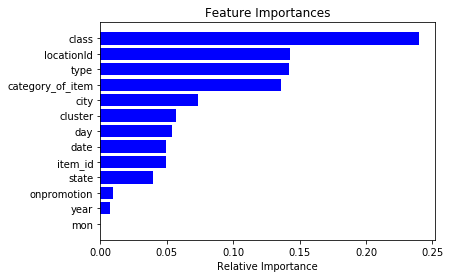

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
features = X_train.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Model 3 - **XGBoost** for 2 years data

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor

In [0]:
xgb = XGBRegressor(n_estimators=50,objective='reg:linear',eta = 0.5,booster='gbtree',max_depth =  3,subsample= .8,colsample_bytree= 0.7,silent= 1,min_child_weight=5)

In [0]:
xgb.fit(X=X_train, y=y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.8, verbosity=1)

In [0]:
y_val_predxgb = xgb.predict(X_val)

In [0]:
import gc
gc.collect()

2

In [0]:
y_trainpredxgb = xgb.predict(X_train)

In [0]:
from sklearn.metrics import mean_absolute_error

In [0]:
mean_absolute_error(y_val,y_val_predxgb)

0.6423372

In [0]:
mean_absolute_error(y_train,y_trainpredxgb)

0.6423442

In [0]:
predictiontr = np.expm1(y_trainpredxgb)
ytrainexp = np.expm1(y_train)
predictionval = np.expm1(y_val_predxgb)
yvalexp = np.expm1(y_val)

In [0]:
mean_absolute_error(ytrainexp,predictiontr)

6.0962377

In [0]:
mean_absolute_error(yvalexp,predictionval)

6.095197

In [0]:
predictionxgb = xgb.predict(test)   # Prediction on test data.

In [0]:
np.round(predictionxgb,2)

array([1.57, 1.6 , 1.58, ..., 1.68, 1.68, 1.68], dtype=float32)

In [0]:
predictionxgb = np.expm1(predictionxgb)

In [0]:
predictionxgb = np.round(predictionxgb,2)  #Rounding off the prediction to two decimal places

In [0]:
submission['unit_sales'] = predictionxgb

In [0]:
submission.to_csv('submission_testwithpromoxgb.csv', index=False, header=True)

**XGB for Randomized Search CV**

Random Search CV is used for finding the best estimator.



In [0]:
xgbr = XGBRegressor(n_jobs=-1,objective='reg:linear',booster='gbtree') 
 
# Use a grid over parameters of interest
param_grid = {
                  'n_estimators' :[50,100,150],
                  "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3 ],
                  "colsample_bytree" : [ 0.3, 0.4, 0.5,0.7],
                  'max_depth': [3,4,6,8,9]
              }

In [0]:
xgb_randomgrid = RandomizedSearchCV(xgbr, param_distributions=param_grid, cv=5)

In [0]:
xgb_randomgrid.fit(X=X_train, y=y_train)

[16:52:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:52:22] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[17:38:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:16] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [0]:
bsxgb = xgb_randomgrid.best_estimator_

In [0]:
y_val_predxgb1 = bsxgb.predict(X_val)

In [0]:
y_trainpredxgb1 = bsxgb.predict(X_train)

In [0]:
mean_absolute_error(y_val,y_val_predxgb1)

0.4926329

In [0]:
mean_absolute_error(y_train,y_trainpredxgb1)

0.4878121

There is a decrease in residual when compared to previous models.

In [0]:
predictiontr = np.expm1(y_trainpredxgb1)
ytrainexp = np.expm1(y_train)
predictionval = np.expm1(y_val_predxgb1)
yvalexp = np.expm1(y_val)

In [0]:
mean_absolute_error(ytrainexp,predictiontr)

In [0]:
mean_absolute_error(yvalexp,predictionval)

In [0]:
predxgb1 = bsxgb.predict(test)   # Predicting test data

In [0]:
predictionxgb1 = np.expm1(predxgb1)

In [0]:
predictionxgb1

array([ 3.3333282, 10.935629 ,  4.7174196, ...,  2.8887389,  2.8887389,
        3.860108 ], dtype=float32)

In [0]:
del submission['unit_sales']

In [0]:
submission.head()

,id
0,0
173,1
637,2
990,3
1518,4


In [0]:
submission['unit_sales'] = predictionxgb1  # Appending predicted sales data to submission file.

In [0]:
submission.to_csv('submission_testwithpromoxgbrandom.csv', index=False, header=True) # saving as CSV file.

# **NeuralNetworks**

In [0]:
data = pd.read_pickle('/content/drive/My Drive/PHD/oneyr.pkl') # loading last year data for better computational efficiency

In [0]:
data = data.sort_values(by='date')

In [0]:
data.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable
5964113,2018-01-01,location_25,item_957098,5.0,False,Kanpur,Uttar Pradesh,D,1,dairy_items,class_2130,1
3252760,2018-01-01,location_25,item_564272,15.0,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1016,0
1066701,2018-01-01,location_25,item_258396,11.0,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1010,0
13401387,2018-01-01,location_25,item_127534,1.0,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1032,0
16559414,2018-01-01,location_25,item_1178696,1.0,False,Kanpur,Uttar Pradesh,D,1,cleaning_utilities,class_3020,0


In [0]:
data = data.reset_index(drop=True)   # Resetting the index.

Adding additional features.

In [0]:
data['date'] = pd.to_datetime(data['date'])   
data['mon'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['date'] = data['date'].dt.dayofweek

In [0]:
data.head(5)

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable,mon,day
0,0,location_25,item_957098,5.0,False,Kanpur,Uttar Pradesh,D,1,dairy_items,class_2130,1,1,1
1,0,location_25,item_564272,15.0,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1016,0,1,1
2,0,location_25,item_258396,11.0,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1010,0,1,1
3,0,location_25,item_127534,1.0,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1032,0,1,1
4,0,location_25,item_1178696,1.0,False,Kanpur,Uttar Pradesh,D,1,cleaning_utilities,class_3020,0,1,1


In [0]:
data = data.drop(['item_id'],axis=1)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35229869 entries, 0 to 35229870
Data columns (total 13 columns):
date                int64
locationId          category
unit_sales          float64
onpromotion         category
city                category
state               category
type                category
cluster             category
category_of_item    category
class               category
perishable          category
mon                 int64
day                 int64
dtypes: category(9), float64(1), int64(3)
memory usage: 1.6 GB


In [0]:
data = data.drop(data[data.unit_sales > 44000].index)

data['unit_sales'] = np.where((data.unit_sales <= 0),0,data.unit_sales)

In [0]:
data['type'] = data['type'].astype('object')
data['cluster'] = data['cluster'].astype('object')
data['class'] = data['class'].astype('object')
data['category_of_item'] = data['category_of_item'].astype('object')
data['onpromotion'] = data['onpromotion'].astype('object')
data['locationId'] = data['locationId'].astype('object')
data['day'] = data['day'].astype('object')
data['date'] = data['onpromotion'].astype('object')
data['mon'] = data['mon'].astype('object')
data['perishable'] = data['perishable'].astype('int8')
data['city'] = data['city'].astype('object')
data['state'] = data['state'].astype('object')

Label Encoding the categorical variables:

In [0]:
data = df_lbl_enc(data)

date
locationId
onpromotion
city
state
type
cluster
category_of_item
class
mon
day


In [0]:
data.dtypes

date                  int64
locationId            int64
unit_sales          float64
onpromotion           int64
city                  int64
state                 int64
type                  int64
cluster               int64
category_of_item      int64
class                 int64
perishable             int8
mon                   int64
day                   int64
dtype: object

In [0]:
for col in ['date', 'locationId', 'type', 'cluster', 'category_of_item','class','mon','day','city','state']:
    data[col] = data[col].astype('category')      # converting to categorical variables

In [0]:
data.dtypes

date                category
locationId          category
unit_sales           float64
onpromotion            int64
city                category
state               category
type                category
cluster             category
category_of_item    category
class               category
perishable              int8
mon                 category
day                 category
dtype: object

In [0]:
num_ind_attr_names = data.select_dtypes(include=['int64','int8']).columns # selecting the numerical attributes

In [0]:
num_ind_attr = data[num_ind_attr_names]

In [0]:
data.to_pickle('/content/drive/My Drive/PHD/data.pkl')   # saving as pickle file

In [0]:
data = pd.read_pickle('/content/drive/My Drive/PHD/data.pkl')  # Reading Pickle file

In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Embedding, concatenate, Flatten, Input

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

**Min Max Scaling**

In [0]:
scaler = MinMaxScaler()      # Scaling numerical attributes

scaled_num_ind_attr = scaler.fit_transform(num_ind_attr) 

In [0]:
category_ind_attr = data.category_of_item.values
class_ind_attr = data['class'].values
loc_ind_attr = data.locationId.values
cluster_ind_attr = data.cluster.values 
type_ind_attr = data['type'].values
day_ind_attr = data.day.values
mon_ind_attr = data.mon.values
date_ind_attr = data.date.values
city_ind_attr = data.city.values
state_ind_attr = data.state.values 

Select Categorical attributes

In [0]:
cat_attr_names = data.select_dtypes(include=['category']).columns

cat_attr_names

Index(['date', 'locationId', 'city', 'state', 'type', 'cluster',
       'category_of_item', 'class', 'mon', 'day'],
      dtype='object')

In [0]:
scaled_num_ind_attr.shape

(35229869, 2)

In [0]:
int_tar_attr_names = data['unit_sales']

In [0]:
n_cat_levels = np.size(np.unique(category_ind_attr, return_counts=True)[0])
n_class_levels = np.size(np.unique(class_ind_attr, return_counts=True)[0])
n_loc_levels = np.size(np.unique(loc_ind_attr, return_counts=True)[0])
n_cluster_levels = np.size(np.unique(cluster_ind_attr, return_counts=True)[0])
n_type_levels = np.size(np.unique(type_ind_attr, return_counts=True)[0])
n_day_levels = np.size(np.unique(day_ind_attr, return_counts=True)[0])
n_mon_levels = np.size(np.unique(mon_ind_attr, return_counts=True)[0])
n_date_levels = np.size(np.unique(date_ind_attr, return_counts=True)[0])
n_city_levels = np.size(np.unique(city_ind_attr, return_counts=True)[0])
n_state_levels = np.size(np.unique(state_ind_attr, return_counts=True)[0])

Categorical unique levels of each categorical variable

In [0]:
print(n_cat_levels, n_class_levels, n_loc_levels, n_cluster_levels,n_type_levels,n_date_levels,n_mon_levels,n_day_levels,n_city_levels,n_state_levels)

30 328 53 17 5 2 12 31 22 13


In [0]:
scaled_num_ind_attr_train, scaled_num_ind_attr_test, \
category_ind_attr_train, category_ind_attr_test, \
class_ind_attr_train, class_ind_attr_test, \
loc_ind_attr_train, loc_ind_attr_test, \
cluster_ind_attr_train, cluster_ind_attr_test, \
type_ind_attr_train, type_ind_attr_test, \
day_ind_attr_train, day_ind_attr_test, \
mon_ind_attr_train, mon_ind_attr_test, \
date_ind_attr_train, date_ind_attr_test, \
city_ind_attr_train,city_ind_attr_test, \
state_ind_attr_train,state_ind_attr_test, \
Y_train, Y_test = train_test_split(scaled_num_ind_attr,
                                                         category_ind_attr, 
                                                         class_ind_attr, 
                                                         loc_ind_attr,
                                                         cluster_ind_attr,
                                                         type_ind_attr,
                                                         day_ind_attr,
                                                         mon_ind_attr,
                                                         date_ind_attr,
                                                         city_ind_attr,
                                                         state_ind_attr,
                                                         int_tar_attr_names,
                                                         test_size=0.1, random_state=123)

**Categorical Embedding:**

In [0]:
category_input = Input(shape=(1, ), name="category")
cat_embed = Embedding(input_dim=n_cat_levels, output_dim=8,)(category_input)

In [0]:
class_input = Input(shape=(1, ), name="cls")
class_embed = Embedding(input_dim=n_class_levels, output_dim=20,)(class_input)

In [0]:
loc_input = Input(shape=(1, ), name="loc")
loc_embed = Embedding(input_dim=n_loc_levels, output_dim=6,)(loc_input)

In [0]:
cluster_input = Input(shape=(1, ), name="cluster")
cluster_embed = Embedding(input_dim=n_cluster_levels, output_dim=4,)(cluster_input)

In [0]:
type_input = Input(shape=(1, ), name="type")
type_embed = Embedding(input_dim=n_type_levels, output_dim=2,)(type_input)

In [0]:
day_input = Input(shape=(1, ), name="day")
day_embed = Embedding(input_dim=n_day_levels, output_dim=7,)(day_input)

In [0]:
mon_input = Input(shape=(1, ), name="mon")
mon_embed = Embedding(input_dim=n_mon_levels, output_dim=4,)(mon_input)

In [0]:
date_input = Input(shape=(1, ), name="week")
date_embed = Embedding(input_dim=n_date_levels, output_dim=3,)(date_input)

In [0]:
city_input = Input(shape=(1, ), name="city")
city_embed = Embedding(input_dim=n_city_levels, output_dim=5,)(city_input)

In [0]:
state_input = Input(shape=(1, ), name="state")
state_embed = Embedding(input_dim=n_state_levels, output_dim=4,)(state_input)

In [0]:
merge_cat_emb = concatenate([cat_embed, class_embed, loc_embed, cluster_embed,type_embed,day_embed,mon_embed,date_embed,city_embed,state_embed])
merge_cat_emb_flat = Flatten()(merge_cat_emb)

In [0]:
from keras.layers import Dense, Dropout, BatchNormalization, Input

**Defining Layers**

In [0]:
num_input = Input(shape=(scaled_num_ind_attr_train.shape[1], ))

x = concatenate([merge_cat_emb_flat, num_input])
x = Dense(10, activation= 'relu',kernel_initializer='glorot_normal')(x)
x = BatchNormalization()(x)
x = Dense(5, activation='relu',kernel_initializer='glorot_normal')(x)
x = BatchNormalization()(x)
output_layer = Dense(1, activation='linear',kernel_initializer="glorot_normal")(x)

model = Model(inputs=[category_input, class_input, loc_input, cluster_input,type_input,day_input,mon_input,date_input,city_input,state_input,num_input], outputs=output_layer)

In [0]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
category (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
cls (InputLayer)                (None, 1)            0                                            
__________________________________________________________________________________________________
loc (InputLayer)                (None, 1)            0                                            
__________________________________________________________________________________________________
cluster (InputLayer)            (None, 1)            0                                            
____________________________________________________________________________________________

In [0]:
model.compile(optimizer='adam', loss='mean_absolute_error')

In [0]:
model.fit([category_ind_attr_train, class_ind_attr_train,
           loc_ind_attr_train, cluster_ind_attr_train,
           type_ind_attr_train,day_ind_attr_train,
           mon_ind_attr_train,date_ind_attr_train,
           city_ind_attr_train,state_ind_attr_train, 
           scaled_num_ind_attr_train], 
          y=Y_train, 
          epochs=30, batch_size=100000,verbose=2)

Epoch 1/30
 - 63s - loss: 7.5453
Epoch 2/30
 - 61s - loss: 6.1129
Epoch 3/30
 - 61s - loss: 5.6434
Epoch 4/30
 - 61s - loss: 5.5953
Epoch 5/30
 - 61s - loss: 5.5887
Epoch 6/30
 - 61s - loss: 5.5856
Epoch 7/30
 - 61s - loss: 5.5839
Epoch 8/30
 - 61s - loss: 5.5827
Epoch 9/30
 - 61s - loss: 5.5818
Epoch 10/30
 - 61s - loss: 5.5810
Epoch 11/30
 - 61s - loss: 5.5802
Epoch 12/30
 - 61s - loss: 5.5795
Epoch 13/30
 - 62s - loss: 5.5788
Epoch 14/30
 - 61s - loss: 5.5783
Epoch 15/30
 - 61s - loss: 5.5776
Epoch 16/30
 - 61s - loss: 5.5772
Epoch 17/30
 - 61s - loss: 5.5768
Epoch 18/30
 - 61s - loss: 5.5766
Epoch 19/30
 - 61s - loss: 5.5763
Epoch 20/30
 - 61s - loss: 5.5761
Epoch 21/30
 - 61s - loss: 5.5760
Epoch 22/30
 - 61s - loss: 5.5757
Epoch 23/30
 - 61s - loss: 5.5755
Epoch 24/30
 - 61s - loss: 5.5753
Epoch 25/30
 - 61s - loss: 5.5751
Epoch 26/30
 - 62s - loss: 5.5750
Epoch 27/30
 - 62s - loss: 5.5749
Epoch 28/30
 - 62s - loss: 5.5747
Epoch 29/30
 - 61s - loss: 5.5746
Epoch 30/30
 - 61s - lo

In [0]:
model.evaluate([category_ind_attr_test, class_ind_attr_test, loc_ind_attr_test, cluster_ind_attr_test,type_ind_attr_test,day_ind_attr_test,mon_ind_attr_test,date_ind_attr_test,city_ind_attr_test,state_ind_attr_test, scaled_num_ind_attr_test], Y_test)

3522987/3522987 [==============================] - 143s 41us/step


5.5775912435869195

Prediction on validation data

In [0]:
p = model.predict([category_ind_attr_test, class_ind_attr_test, loc_ind_attr_test, cluster_ind_attr_test,type_ind_attr_test,day_ind_attr_test,mon_ind_attr_test,date_ind_attr_test,city_ind_attr_test,state_ind_attr_test, scaled_num_ind_attr_test])

In [0]:
p[:5]

array([[3.4850914],
       [2.2349005],
       [8.638496 ],
       [1.850769 ],
       [3.6067455]], dtype=float32)

In [0]:
test = pd.read_csv('/content/drive/My Drive/PHD/test.csv')  # Reading Test Data

In [0]:
test.shape

(1482295, 5)

In [0]:
item_data = pd.read_csv("/content/drive/My Drive/PHD/item_details.csv")
location_data = pd.read_csv('/content/drive/My Drive/PHD/location_details.csv')

In [0]:
test = pd.merge(test,location_data,left_on="locationId",right_on="location_id")

In [0]:
del test['location_id']

In [0]:
test.head()

,id,date,locationId,item_id,onpromotion,city,state,type,cluster
0,0,2019-01-01,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1
1,1,2019-01-01,location_25,item_103665,False,Kanpur,Uttar Pradesh,D,1
2,2,2019-01-01,location_25,item_105574,False,Kanpur,Uttar Pradesh,D,1
3,3,2019-01-01,location_25,item_105857,False,Kanpur,Uttar Pradesh,D,1
4,4,2019-01-01,location_25,item_106716,False,Kanpur,Uttar Pradesh,D,1


In [0]:
test = pd.merge(test,item_data,left_on="item_id",right_on="item_id")

In [0]:
test.head()

,id,date,locationId,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,0,2019-01-01,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
1,164818,2019-01-03,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
2,273422,2019-01-04,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
3,378240,2019-01-05,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
4,587109,2019-01-07,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0


In [0]:
test = test.sort_values(by='id')

In [0]:
test['date'] = pd.to_datetime(test['date'])
test['mon'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['date'] = test['date'].dt.dayofweek

In [0]:
test = test.drop(['item_id'],axis=1)

In [0]:
test['type'] = test['type'].astype('object')
test['cluster'] = test['cluster'].astype('object')
test['class'] = test['class'].astype('object')
test['category_of_item'] = test['category_of_item'].astype('object')
test['onpromotion'] = test['onpromotion'].astype('object')
test['locationId'] = test['locationId'].astype('object')
test['day'] = test['day'].astype('object')
test['date'] = test['onpromotion'].astype('object')
test['mon'] = test['mon'].astype('object')
test['perishable'] = test['perishable'].astype('int8')
test['city'] = test['city'].astype('object')
test['state'] = test['state'].astype('object')

In [0]:
test = df_lbl_enc(test)   #label encoding

date
locationId
onpromotion
city
state
type
cluster
category_of_item
class
mon
day


In [0]:
test.dtypes

id                  int64
date                int64
locationId          int64
onpromotion         int64
city                int64
state               int64
type                int64
cluster             int64
category_of_item    int64
class               int64
perishable           int8
mon                 int64
day                 int64
dtype: object

In [0]:
for col in ['date', 'locationId', 'type', 'cluster', 'category_of_item','class','mon','day','city','state']:
    test[col] = test[col].astype('category')

In [0]:
test.dtypes

id                     int64
date                category
locationId          category
onpromotion            int64
city                category
state               category
type                category
cluster             category
category_of_item    category
class               category
perishable              int8
mon                 category
day                 category
dtype: object

In [0]:
submission = test[['id']].copy()

In [0]:
test.head(2)

,id,date,locationId,onpromotion,city,state,type,cluster,category_of_item,class,perishable,mon,day
0,0,0,17,0,10,11,3,0,8,42,0,0,0
173,1,0,17,0,10,11,3,0,0,179,1,0,0


In [0]:
del test['id']

In [0]:
num_ind_attr_names_test = test.select_dtypes(include=['int64','int8']).columns

In [0]:
num_ind_attr_test = test[num_ind_attr_names]
num_ind_attr_test.head()

,onpromotion,perishable
0,0,0
173,0,1
637,0,0
990,0,0
1518,0,0


In [0]:
scaler = MinMaxScaler()

scaled_num_ind_attr1 = scaler.fit_transform(num_ind_attr_test) 

In [0]:
category_ind_attr1 = test.category_of_item.values
class_ind_attr1 = test['class'].values
loc_ind_attr1 = test.locationId.values
cluster_ind_attr1 = test.cluster.values 
type_ind_attr1 = test['type'].values
day_ind_attr1 = test.day.values
mon_ind_attr1 = test.mon.values
date_ind_attr1 = test.date.values
city_ind_attr1 = test.city.values
state_ind_attr1 = test.state.values

Prediction on Test Data

In [0]:
prediction = model.predict([category_ind_attr1, class_ind_attr1, loc_ind_attr1, cluster_ind_attr1,type_ind_attr1,day_ind_attr1,mon_ind_attr1,date_ind_attr1,city_ind_attr1,state_ind_attr1, scaled_num_ind_attr1])

In [0]:
prediction

array([[1.3641617],
       [3.10124  ],
       [3.3014731],
       ...,
       [2.2457972],
       [2.2457972],
       [2.2457972]], dtype=float32)

In [0]:
submission['unit_sales'] = prediction

In [0]:
submission.shape

(1482295, 2)

Submission File:

In [0]:
submission.to_csv('submissionnnwithout_idnewstate.csv',index=False)

# **Answering Operations Team at Small Basket**

In [0]:
test1 = pd.read_csv('/content/drive/My Drive/PHD/test.csv')

In [0]:
item_data = pd.read_csv("/content/drive/My Drive/PHD/item_details.csv")
location_data = pd.read_csv('/content/drive/My Drive/PHD/location_details.csv')

In [0]:
test_loc = pd.merge(test1,location_data,left_on="locationId",right_on="location_id")

In [14]:
test_loc.head()

,id,date,locationId,item_id,onpromotion,location_id,city,state,type,cluster
0,0,2019-01-01,location_25,item_99197,False,location_25,Kanpur,Uttar Pradesh,D,1
1,1,2019-01-01,location_25,item_103665,False,location_25,Kanpur,Uttar Pradesh,D,1
2,2,2019-01-01,location_25,item_105574,False,location_25,Kanpur,Uttar Pradesh,D,1
3,3,2019-01-01,location_25,item_105857,False,location_25,Kanpur,Uttar Pradesh,D,1
4,4,2019-01-01,location_25,item_106716,False,location_25,Kanpur,Uttar Pradesh,D,1


In [0]:
del test_loc['location_id']

In [0]:
test_loc_item = pd.merge(test_loc,item_data,left_on="item_id",right_on="item_id")

In [17]:
test_loc_item.head()

,id,date,locationId,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,0,2019-01-01,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
1,164818,2019-01-03,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
2,273422,2019-01-04,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
3,378240,2019-01-05,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
4,587109,2019-01-07,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0


In [0]:
test_loc_item = test_loc_item.sort_values(by = 'id')

In [19]:
test_loc_item.head()

,id,date,locationId,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,0,2019-01-01,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
173,1,2019-01-01,location_25,item_103665,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
637,2,2019-01-01,location_25,item_105574,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0
990,3,2019-01-01,location_25,item_105857,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1092,0
1518,4,2019-01-01,location_25,item_106716,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1032,0


In [0]:
submission = pd.read_csv('/content/drive/My Drive/PHD/submissionnnwithout_idnewstate.csv')

In [0]:
test_final = pd.merge(test_loc_item,submission,left_on="id",right_on="id")

In [0]:
test_final['date'] = pd.to_datetime(test_final.date)

In [0]:
test_final['week']=test_final.date.dt.week

In [24]:
test_final.dtypes

id                           int64
date                datetime64[ns]
locationId                  object
item_id                     object
onpromotion                   bool
city                        object
state                       object
type                        object
cluster                      int64
category_of_item            object
class                       object
perishable                   int64
unit_sales                 float64
week                         int64
dtype: object

In [0]:
test_final['id'] = test_final['id'].astype('object')
test_final['onpromotion'] = test_final['onpromotion'].astype('object')
test_final['cluster'] = test_final['cluster'].astype('object')
test_final['perishable'] = test_final['perishable'].astype('object')
test_final['week'] = test_final['week'].astype('object')

**Top Performing Cluster and Business Unit**

In [1]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving Sheet 3.png to Sheet 3.png


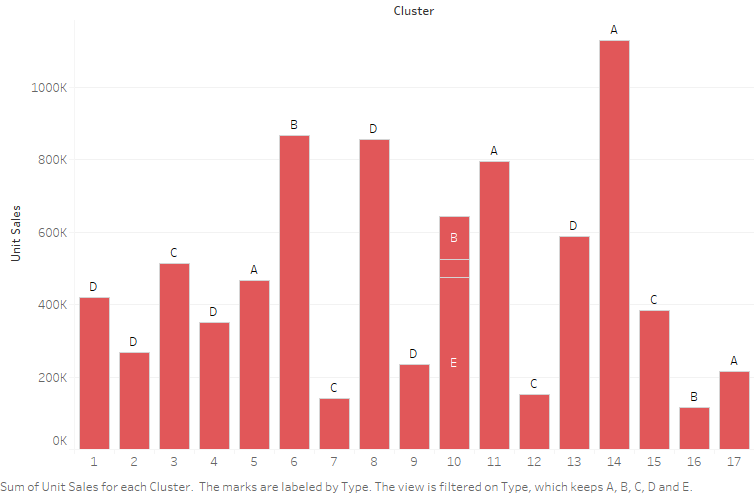

In [4]:
Image("Sheet 3.png", width=600)

From this plot we can find that Cluster 14 will see the highest amount of sales and Cluster 14 belongs to Type 'A' business unit for the first 15 days of January 2019.

In [0]:
test_final.to_csv('test_final.csv')

In [0]:
analysis_data = test_final[test_final['cluster']== 14 ]

In [0]:
analysis_data.to_csv('analysis_data.csv')

**Top Performing Categories of Item**

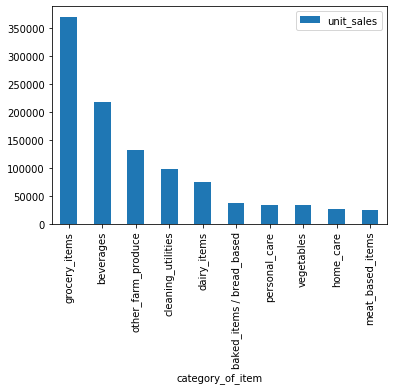

In [27]:
analysis_data.groupby(['category_of_item']).sum().sort_values(by='unit_sales',ascending=False).head(10).plot(kind='bar')

From this plot we can infer that grocery items will be the top performing category followed by beverages for the first 15 days of 2019.

In [28]:
analysis_data.groupby(['category_of_item']).sum().sort_values(by='unit_sales',ascending=False).head(10)

,unit_sales
category_of_item,
grocery_items,370151.391980
beverages,217315.332511
other_farm_produce,132507.638057
cleaning_utilities,97889.500866
dairy_items,75235.365664
baked_items / bread_based,37328.040662
personal_care,34168.657494
vegetables,33419.559601
home_care,26343.630794


**Item Sales**

In [0]:
item_sales = analysis_data.groupby(['item_id','category_of_item'],as_index=False).agg({'unit_sales':'sum'})
item_sales=item_sales.sort_values(by='unit_sales',ascending=False)[:10]

In [0]:
item=[]
item = item_sales['item_id']

In [0]:
category_sales = analysis_data.groupby('category_of_item',as_index=False).agg({'unit_sales':'sum'})
category_sales=category_sales.sort_values(by='unit_sales',ascending=False)[:10]

In [0]:
category = []
category = category_sales['category_of_item']

In [40]:
uploaded = files.upload()

Saving top10.png to top10.png


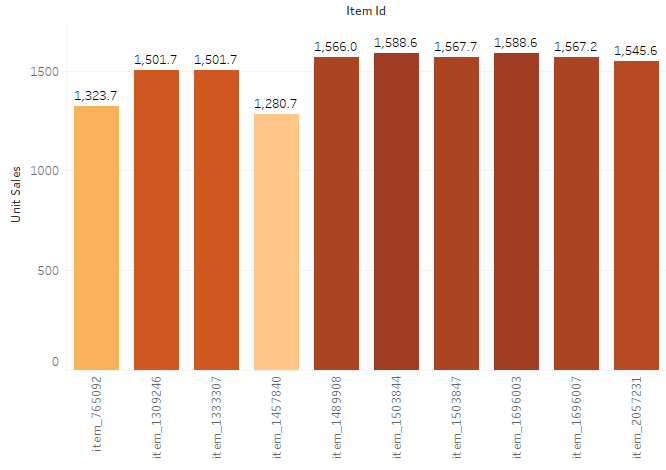

In [43]:
Image("top10.png", width=600)

From this plot we can infer these are the top 10 selling items according to the predictions for cluster 14.

**Rate of Purchase per Week**

In [0]:
analysis_data.groupby(["category_of_item",'week']).sum().sort_values("unit_sales", ascending=False).head(5)

In [56]:
uploaded = files.upload()

Saving item10.png to item10.png


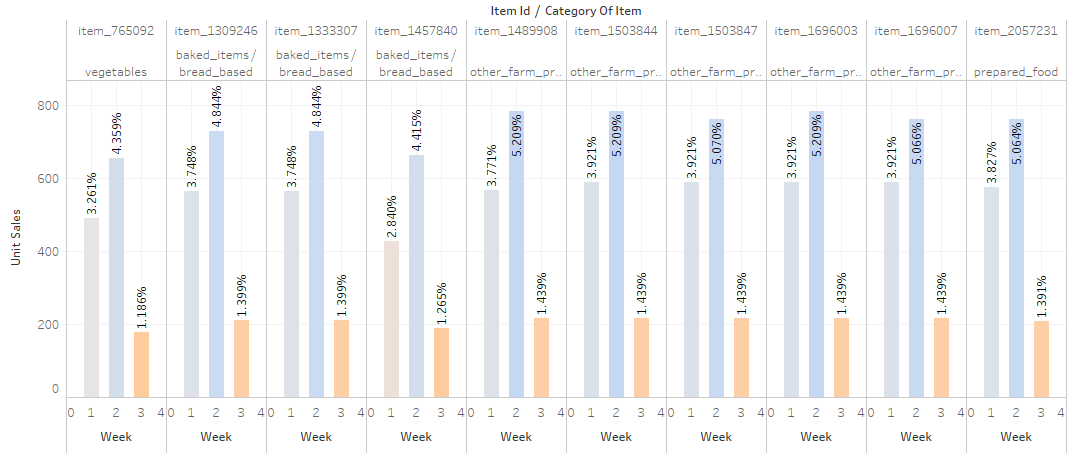

In [60]:
Image("item10.png", width=1200)

From this plot we can infer that these are the weekwise rate of purchase for the top 10 items of cluster 14.

In [0]:
analysis_data2 = analysis_data[analysis_data['item_id'].isin(item)].groupby(['item_id','week'],as_index=False).agg({'unit_sales':'sum'})

In [0]:
wk1sales = analysis_data2[analysis_data2['week']==1].unit_sales.sum()
wk2sales = analysis_data2[analysis_data2['week']==2].unit_sales.sum()
wk3sales = analysis_data2[analysis_data2['week']==3].unit_sales.sum()

In [0]:
analysis_data2.loc[analysis_data2['week']==1, 'rt_of_purchase'] = (analysis_data2['unit_sales']/wk1sales)*100
analysis_data2.loc[analysis_data2['week']==2, 'rt_of_purchase'] = (analysis_data2['unit_sales']/wk2sales)*100
analysis_data2.loc[analysis_data2['week']==3, 'rt_of_purchase'] = (analysis_data2['unit_sales']/wk3sales)*100

In [54]:
analysis_data2.head(5)

,item_id,week,unit_sales,rt_of_purchase
0,item_1309246,1,563.357943,10.162031
1,item_1309246,2,728.085712,9.827551
2,item_1309246,3,210.257790,10.112416
3,item_1333307,1,563.357943,10.162031
4,item_1333307,2,728.085728,9.827552


In [0]:
analysis_data2.to_csv('analysis_data2.csv')

In [0]:
analysis_data3 = analysis_data[analysis_data['category_of_item'].isin(category)].groupby(['category_of_item','week'],as_index=False).agg({'unit_sales':'sum'})

In [0]:
analysis_data3.head()

In [58]:
uploaded = files.upload()

Saving cat.png to cat (1).png


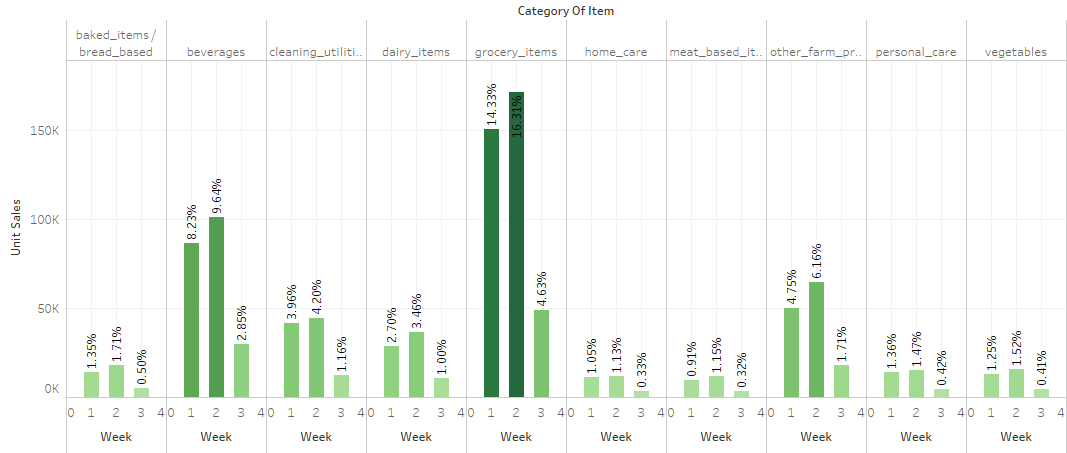

In [61]:
Image("cat.png", width=1200)

From this plot we can infer that these are the weekwise rate of purchase for the top 10 category of items of cluster 14. Week 2 is having more contribution than week1.

In [0]:
wk1cat = analysis_data3[analysis_data3['week']==1].unit_sales.sum()
wk2cat = analysis_data3[analysis_data3['week']==2].unit_sales.sum()
wk3cat = analysis_data3[analysis_data3['week']==3].unit_sales.sum()

In [0]:
analysis_data3.loc[analysis_data2['week']==1, 'rt_of_purchase'] = (analysis_data3['unit_sales']/wk1cat)*100
analysis_data3.loc[analysis_data2['week']==2, 'rt_of_purchase'] = (analysis_data3['unit_sales']/wk2cat)*100
analysis_data3.loc[analysis_data2['week']==3, 'rt_of_purchase'] = (analysis_data3['unit_sales']/wk3cat)*100

In [0]:
analysis_data3.sort_values('week')

# ***THANK YOU.***